In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score , confusion_matrix,classification_report



In [2]:

# Load dataset
file_path = 'Updated_IMDB_Movie_Data.csv'
data = pd.read_csv(file_path) 
import pandas as pd

class DataCleaner:
    def __init__(self, data):
        self.data = data
    
    def clean_data(self):
        self.data = self.data.dropna(subset=['Title', 'Genre', 'Description'])
        for column in self.data.select_dtypes(include=['float64', 'int64']).columns:
            self.data[column] = self.data[column].fillna(0)  
        for column in self.data.select_dtypes(include=['object']).columns:
            self.data[column] = self.data[column].fillna('Unknown')  
        print("Data cleaned.")
        return self.data



cleaner = DataCleaner(data)
cleaned_data = cleaner.clean_data()
data.head(5)

Data cleaned.


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Release Season,Director Avg Rating,Lead Actor Avg Revenue,Genre Avg Revenue
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Fall,7.133333,218.911429,138.074682
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Summer,6.850000,37.122500,114.785737
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Fall,5.533333,96.375556,53.141262
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Fall,7.200000,270.320000,131.049968
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Fall,7.166667,148.920000,136.840536


## Normalize columns 

In [3]:
# Normalize numeric columns
scaler = StandardScaler()
data[['Votes',  'Rating']] = scaler.fit_transform(data[['Votes',  'Rating']])
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Release Season,Director Avg Rating,Lead Actor Avg Revenue,Genre Avg Revenue
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,1.456999,3.112690,333.13,76.0,Fall,7.133333,218.911429,138.074682
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,0.292924,1.674960,126.46,65.0,Summer,6.850000,37.122500,114.785737
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,0.610399,-0.064676,138.12,62.0,Fall,5.533333,96.375556,53.141262
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,0.504574,-0.579129,270.32,59.0,Fall,7.200000,270.320000,131.049968
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,-0.553677,1.186839,325.02,40.0,Fall,7.166667,148.920000,136.840536


## Utility Based Agent

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

class MovieRecommendationAgent:
    def __init__(self, data):
        # Initialize the dataset
        self.data = data
        self.recommendations = []

    def compute_utility(self, movie, user_preferences):
        """Compute a utility score for a movie based on user preferences."""
        utility = 0

        # Add points for average rating
        utility += movie['Rating'] * user_preferences.get('rating_weight', 1)

        # Add points for matching genres
        preferred_genres = user_preferences.get('genres', [])
        if any(genre in movie['Genre'].split(', ') for genre in preferred_genres):
            utility += user_preferences.get('genre_weight', 2)

        # Add points for popularity
        utility += movie.get('Popularity', 0) * user_preferences.get('popularity_weight', 0.01)

        # Penalize for low vote count if specified
        min_votes = user_preferences.get('min_votes', 0)
        if movie['Votes'] < min_votes:
            utility -= user_preferences.get('vote_penalty', 5)

        return utility

    def recommend_movies(self, user_preferences, top_n=5):
        """Generate movie recommendations based on utility scores."""
        self.data['Utility'] = self.data.apply(
            lambda movie: self.compute_utility(movie, user_preferences), axis=1
        )
        top_movies = self.data.nlargest(top_n, 'Utility')
        self.recommendations = top_movies[['Title', 'Genre', 'Rating', 'Votes', 'Utility']]




    def display_recommendations(self):
        """Print the recommended movies."""
        print("Top Movie Recommendations:")
        for _, row in self.recommendations.iterrows():
            print(f"- {row['Title']} | Genre: {row['Genre']} | Rating: {row['Rating']} | "
                  f"Votes: {row['Votes']} | Utility: {row['Utility']}")

    def evaluate_recommendations(self, test_data, user_preferences):
        """Evaluate the accuracy of recommendations."""
        test_data['Utility'] = test_data.apply(lambda movie: self.compute_utility(movie, user_preferences), axis=1)
        test_data['Recommended'] = test_data['Utility'] > test_data['Utility'].median()

        # Assume test_data contains a column 'UserLiked' with 1 for liked movies and 0 otherwise
        y_true = test_data['UserLiked']
        y_pred = test_data['Recommended']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        print("\nEvaluation Metrics:")
        print(f"Precision: {precision * 100:.2f}%")
        print(f"Recall: {recall * 100:.2f}%")
        print(f"F1-Score: {f1 * 100:.2f}%")
        print(f"Accuracy: {accuracy * 100:.2f}%")



In [5]:
# Example customer usage

data = pd.read_csv("Updated_IMDB_Movie_Data.csv")
agent = MovieRecommendationAgent(data)

user_preferences = {
    'rating_weight': 2,              # Emphasize rating
    'genres': ['Action', 'Sci-Fi'],  # Preferred genres
    'popularity_weight': 0.05,       # Scale popularity
    'min_votes': 1000,               # Minimum vote count threshold
    'vote_penalty': 10               # Penalty for low votes
}

# Generate and display recommendations
agent.recommend_movies(user_preferences)
agent.display_recommendations()

# Evaluate recommendations
test_data = data.copy()
test_data['UserLiked'] = test_data['Rating'].apply(lambda x: 1 if x >= 7 else 0)
agent.evaluate_recommendations(test_data, user_preferences)



Top Movie Recommendations:
- The Dark Knight | Genre: Action,Crime,Drama | Rating: 9.0 | Votes: 1791916 | Utility: 18.0
- Inception | Genre: Action,Adventure,Sci-Fi | Rating: 8.8 | Votes: 1583625 | Utility: 17.6
- Dangal | Genre: Action,Biography,Drama | Rating: 8.8 | Votes: 48969 | Utility: 17.6
- Interstellar | Genre: Adventure,Drama,Sci-Fi | Rating: 8.6 | Votes: 1047747 | Utility: 17.2
- Kimi no na wa | Genre: Animation,Drama,Fantasy | Rating: 8.6 | Votes: 34110 | Utility: 17.2

Evaluation Metrics:
Precision: 87.58%
Recall: 98.20%
F1-Score: 92.58%
Accuracy: 93.00%


## Depth first algorithm

In [6]:
import pandas as pd

class SearchAlgorithm:
    def __init__(self, data):
        """
        Initialize the SearchAlgorithm with a DataFrame.
        """
        self.data = data.copy()  # Make a copy of the data to avoid altering the original dataset.
    
    def dfs_search(self, column, query):
        """
        Perform a Depth-First Search (DFS) on the specified column of the DataFrame.
        """
        visited = set()  # Track visited rows.
        stack = list(self.data.index)  # Initialize the stack with all row indices.
        results = []  # Store search results.
        
        while stack:
            index = stack.pop()  # Get the last element in the stack.
            if index in visited:
                continue
            visited.add(index)  # Mark the current index as visited.
            
            # Access the row and check if the query matches the column value.
            row = self.data.loc[index]
            value = str(row[column]).lower()  # Convert to string and lowercase for case-insensitive search.
            if query.lower() in value:
                results.append(row)
        
        return pd.DataFrame(results)
    
    def search_by_title(self, query):
        """
        Search movies by title.
        """
        return self.dfs_search('Title', query)
    
    def search_by_genre(self, genre):
        """
        Search movies by genre.
        """
        results = []
        stack = list(self.data.index)
        visited = set()
        
        while stack:
            index = stack.pop()
            if index in visited:
                continue
            visited.add(index)
            
            # Check if the genre matches the row's Genre column.
            row = self.data.loc[index]
            genres = str(row['Genre']).lower().split(', ')  # Split genres by ', '.
            if genre.lower() in genres:
                results.append(row)
        
        return pd.DataFrame(results)
    
    def search_by_description(self, keyword):
        """
        Search movies by a keyword in their description.
        """
        return self.dfs_search('Description', keyword)
    
    def search_by_rating(self, min_rating):
        """
        Search movies with a minimum rating.
        """
        results = []
        stack = list(self.data.index)
        visited = set()
        
        while stack:
            index = stack.pop()
            if index in visited:
                continue
            visited.add(index)
            
            row = self.data.loc[index]
            try:
                rating = float(row['Rating'])  # Ensure rating is a float.
                if rating >= min_rating:
                    results.append(row)
            except ValueError:
                # Skip rows where the rating cannot be converted to float.
                continue
        
        return pd.DataFrame(results)
    
    def search_by_director(self, director_name):
        """
        Search movies by director's name.
        """
        return self.dfs_search('Director', director_name)




# Create an instance of the SearchAlgorithm
agent = SearchAlgorithm(data)

In [7]:

# Perform searches
# Example 1: Search by genre
recommendations_by_genre = agent.search_by_genre("Action")
print("Top 2 recommendations by genre:")
(recommendations_by_genre.head(2))


Top 2 recommendations by genre:


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Release Season,Director Avg Rating,Lead Actor Avg Revenue,Genre Avg Revenue,Utility
580,581,Kickboxer: Vengeance,Action,A kick boxer is out to avenge his brother.,John Stockwell,"Dave Bautista, Alain Moussi, Gina Carano, Jean...",2016,90,4.9,6809,131.56,37.0,Fall,4.9,131.56,124.494476,11.8
123,124,Boyka: Undisputed IV,Action,In the fourth installment of the fighting fran...,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...",2016,86,7.4,10428,NaN,NaN,Fall,7.4,NaN,124.494476,16.8


In [8]:

# Example 2: Search by title
recommendations_by_title = agent.search_by_title("avengers")
print("\nTop 2 recommendations by title:")
(recommendations_by_title.head(2))


Top 2 recommendations by title:


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Release Season,Director Avg Rating,Lead Actor Avg Revenue,Genre Avg Revenue,Utility
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0,Fall,7.75,249.026364,138.074682,14.8
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,Summer,7.75,249.026364,130.023510,16.2


In [9]:

# Example 3: Search by description
recommendations_by_description = agent.search_by_description("hero")
print("\nTop 2 recommendations by description:")
(recommendations_by_description.head(2))



Top 2 recommendations by description:


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Release Season,Director Avg Rating,Lead Actor Avg Revenue,Genre Avg Revenue,Utility
983,984,Let's Be Cops,Comedy,Two struggling pals dress as police officers f...,Luke Greenfield,"Jake Johnson, Damon Wayans Jr., Rob Riggle, Ni...",2014,104,6.5,112729,82.39,30.0,Fall,6.5,82.39,75.750784,13.0
942,943,Transpecos,Thriller,For three Border Patrol agents working a remot...,Greg Kwedar,"Johnny Simmons, Gabriel Luna, Clifton Collins ...",2016,86,5.8,1292,NaN,73.0,Fall,5.8,16.20,69.577255,11.6


In [10]:

# Example 4: Search by rating
recommendations_by_rating = agent.search_by_rating(8.0)
print("\nTop 2 recommendations by rating (>= 8.0):")
(recommendations_by_rating.head(2))


Top 2 recommendations by rating (>= 8.0):


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Release Season,Director Avg Rating,Lead Actor Avg Revenue,Genre Avg Revenue,Utility
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.2,42.0,Spring,8.5,1.2,77.244306,17.0
861,862,Koe no katachi,"Animation,Drama,Romance","The story revolves around Nishimiya Shoko, a g...",Naoko Yamada,"Miyu Irino, Saori Hayami, Aoi Yuki, Kenshô Ono",2016,129,8.4,2421,NaN,80.0,Fall,8.4,NaN,94.523544,16.8


In [11]:

# Example 5: Search by director
recommendations_by_director = agent.search_by_director("Christopher Nolan")
print("\nTop 2 recommendations by director:")
(recommendations_by_director.head(2))


Top 2 recommendations by director:


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Release Season,Director Avg Rating,Lead Actor Avg Revenue,Genre Avg Revenue,Utility
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,Summer,8.68,137.765833,97.035865,17.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,Summer,8.68,124.206667,138.074682,17.6


##   GradientBoostingRegressor

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Handle missing values in 'Revenue (Millions)'
data['Revenue (Millions)'] = data['Revenue (Millions)'].fillna(data['Revenue (Millions)'].mean())

# Step 1: Add more features
additional_features = [
    'Genre Avg Revenue',
    'Lead Actor Avg Revenue',
    'Director Avg Rating',
    'Metascore',
    'Quality Score'
]

# Ensure these features exist and handle missing values if needed
for feature in additional_features:
    if feature in data.columns:
        data[feature] = data[feature].fillna(data[feature].mean())
    else:
        if feature == 'Quality Score':
            # Create 'Quality Score' if missing
            data['Quality Score'] = (data['Rating'] * 10 + data['Metascore']) / 2

# Combine new features with the original feature set
features = ['Runtime (Minutes)', 'Votes', 'Rating', 'Year'] + additional_features
X = data[features]
y = data['Revenue (Millions)']  # Continuous target variable

# Normalize/scale features for consistency
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train Model
# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

# Step 4: Evaluate the Model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Print results
print("Gradient Boosting Regressor Results:")
print(f"Mean Squared Error: {mse_gbr:.2f}")
print(f"R^2 Score: {r2_gbr:.2f}")


Gradient Boosting Regressor Results:
Mean Squared Error: 2984.94
R^2 Score: 0.68


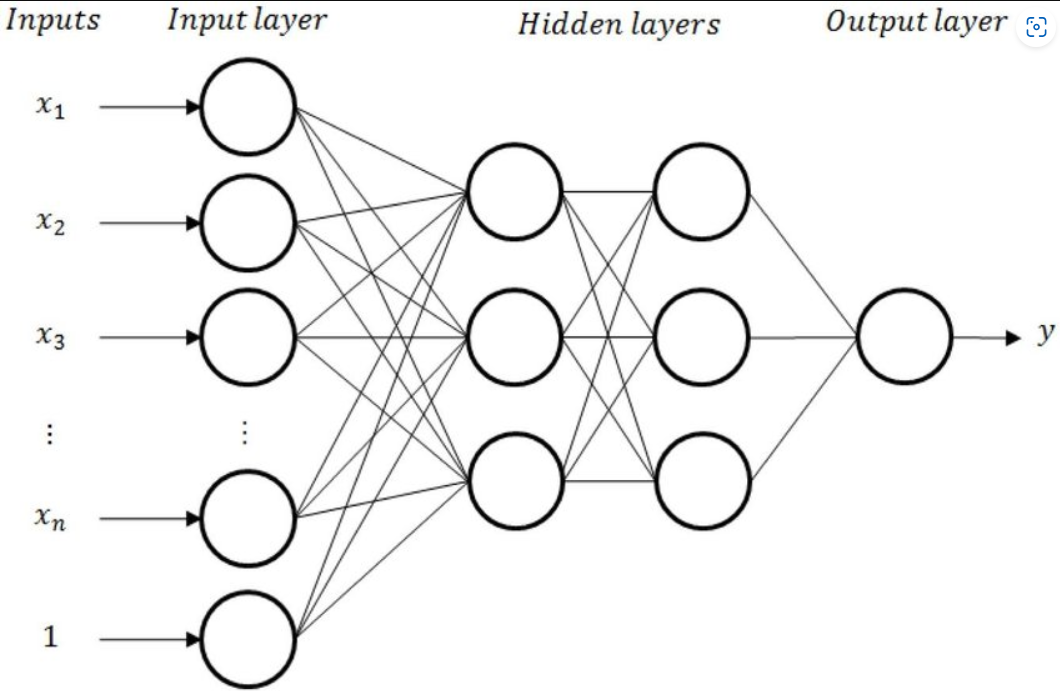

## MLP Neural network

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


# Define target and features
# Assuming success is based on whether 'Revenue (Millions)' is above a threshold (e.g., 100)
data['Success'] = (data['Revenue (Millions)'] > 100).astype(int)  # Binary target (1 = success, 0 = failure)

# Select relevant features and target
features = ['Runtime (Minutes)', 'Votes', 'Rating', 'Year']
X = data[features].values
y = data['Success'].values.reshape(-1, 1)

# Scale features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize weights
input_layer_neurons = X_train.shape[1]  # Number of features
hidden_layer_neurons = 10  # Number of neurons in hidden layer (adjustable)
output_layer_neurons = 1  # For binary classification

weights1 = np.random.random((input_layer_neurons, hidden_layer_neurons))
weights2 = np.random.random((hidden_layer_neurons, output_layer_neurons))

# Learning rate
learning_rate = 0.1
# Number of epochs
epochs = 5000

# Training process
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights1)
    hidden_layer_output = sigmoid(hidden_layer_input) 
    output_layer_input = np.dot(hidden_layer_output, weights2)
    output = sigmoid(output_layer_input)    # y
    
    # Backpropagation
    error = (y_train - output)
    d_output = error * sigmoid_derivative(output)    # DELTA 5
    error_hidden_layer = d_output.dot(weights2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)       # hidden_layer_output O3,O4
    
    # Update weights
    weights2 += hidden_layer_output.T.dot(d_output) * learning_rate
    weights1 += X_train.T.dot(d_hidden_layer) * learning_rate

# Test the model
hidden_layer_input_test = np.dot(X_test, weights1)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
output_layer_input_test = np.dot(hidden_layer_output_test, weights2)
test_output = sigmoid(output_layer_input_test)

# Convert probabilities to binary predictions
predicted_labels = np.round(test_output)
# Calculate accuracy
accuracy = np.mean(predicted_labels == y_test) * 100

# Make it a "constant" (by convention, uppercase name means do not change it)
FINAL_ACCURACY = accuracy

# Print the accuracy
print(f"Model accuracy on test data: {FINAL_ACCURACY:.2f}%")


Model accuracy on test data: 83.50%
